In [1]:
import json
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from gensim.models.word2vec import Word2Vec

Using TensorFlow backend.


In [2]:
import sys
sys.path.append("../../../")

from graph_dynamics.dynamics import Macrostates
from graph_dynamics.dynamics import GenerativeDynamics
from graph_dynamics.utils import graph_paths_visualization
from graph_dynamics.dynamics import GraphsFormatsHandlers
from graph_dynamics.networks.datatypes import VanillaGraph
from graph_dynamics.networks.communities import CommunityGraph

from graph_dynamics.dynamics import datatypes
from graph_dynamics.dynamics import MacrostatesHandlers
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.utils import gd_files_handler
from graph_dynamics.embeddings import alignment
from graph_dynamics.dynamics import GenerativeDynamicsCommunities
from graph_dynamics.networks import communities
from graph_dynamics.embeddings import node2vec

In [3]:
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes

In [4]:
Macrostates.macrostate_function_dictionary.keys()

['advanced_stats',
 'pagerank',
 'deepwalk_online',
 'new_nodes',
 'basic_stats',
 'degree_nodes',
 'node2vec_macrostates',
 'bigclam',
 'node2vec_online_macrostates',
 'degree_centrality']

In [5]:
simulations_directory = "/home/cesar/Desktop/GraphsDynamics/Simulations/"
dynamics_identifier = "Communities"
gd_directory = simulations_directory + dynamics_identifier + "_gd/"
number_of_steps = 30

In [6]:
ALL_TIME_INDEXES,DYNAMICS_PARAMETERS,macroNumbers = gd_files_handler.gd_folder_stats(gd_directory,True)

Dynamics Communities
{u'DynamicsClassParameters': {u'CommunitiesForestFire': {u'0': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                                                u'OrphanPrb': 0.0,
                                                                u'StartNNodes': 1,
                                                                u'Take2AmbasPrb': 0.0},
                                                         u'1': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                     

# Take The Communities

In [17]:
graph_object = datatypes.get_graph_from_dynamics(gd_directory,1)
#graph_object.get_graph_state()["communities"]

In [23]:
#graph_object.get_graph_state()["communities"]

In [24]:
nargs = {"dimensions":2,
         "directed":False,
         "p":0.001,
         "q":2,
         "num_walks":10,
         "walk_length":80,
         "window_size":10,
         "workers":8,
         "iter":10,
         "weighted":False,
         "undirected":True}
    
node_embeddings = Macrostates.node2vec_macrostates(graph_object,(nargs))

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [25]:
communities = graph_object.get_graph_state()["communities"]

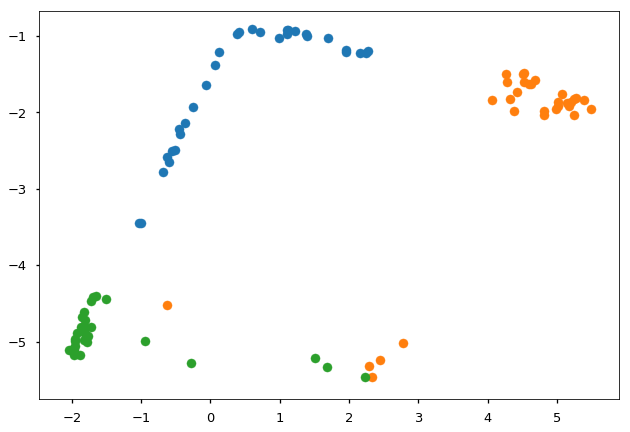

In [26]:
w_communities = {}
for comm, values in communities.iteritems():
    w_communities[comm] = np.array([node_embeddings[str(node)] for node in values])
for w in w_communities.values():
    try:
        plt.scatter(w[:,0], w[:,1])
    except:
        pass
plt.show()